<a href="https://colab.research.google.com/github/KaanBaspinar00/SignalProcess/blob/main/Signal-Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch 5 - Data Filtering

## Filter Types
* LTI (Linear Time Invariant)
* FIR (Finite Impulse Response)
* IIR (Infinite Impulse Response)
* Morphological

### LTI
“doubling the input doubles the output”

Time invariance: the system coefficients do not change for the period of the investigation

* FIR
> Moving window filter, which is moved over the incoming data points, and is called “finite impulse response (FIR)” filter

* IIR
> The coefficients a_i and b_j uniquely determine this type of filter, which is commonly referred to as “infinite impulse response” (IIR) filter


The advantage of FIR filters is their simplicity; the advantage of IIR filters is the sharper frequency responses that can be achieved with a given filter order. The two names finite impulse response filter and infinite impulse response filter are derived from the differing behavior of each type of filter to an impulse input.


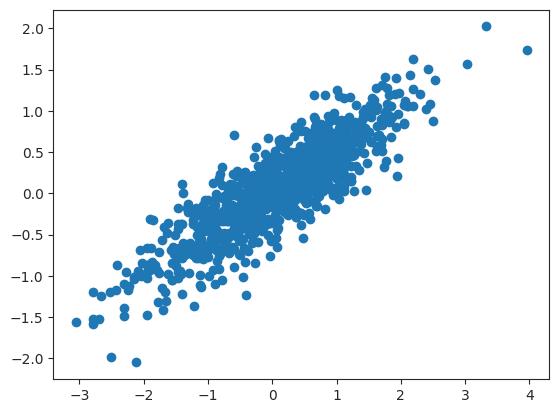

In [ ]:
#Hands-on Signal
#Analysis with Python
#Page: 76

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
# Dummy input_data and parameter
np.random.seed(1)
x = np.random.randn(1000)
alpha = 0.5
# IIR filter coefficients for exponential averaging filter
a = [1, -(1-alpha)]
b = [alpha]
# Apply the filter
y = signal.lfilter(b,a,x)
plt.scatter(x,y)

Image saved to FIRvsIIR.jpg


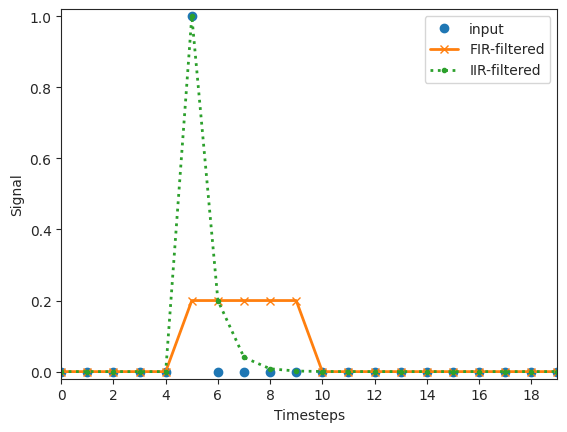

In [ ]:
""" Show the effect of an FIR- and an IIR-filter on an impulse """
# Import the standard packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
# Generate the impulse and the time-axis
xx = np.zeros(20)
xx[5] = 1
tt = np.arange(20)
# Put the results into a Python-dictionary
data = {}
data['before'] = xx
data['after_fir'] = signal.lfilter(np.ones(5)/5, 1, xx)
data['after_iir'] = signal.lfilter([1], [1, -0.2], xx)
# Show the results
plt.plot(tt, data['before'], 'o', label='input', lw=2)
plt.plot(tt, data['after_fir'], 'x-', label='FIR-filtered', lw=2)
plt.plot(tt, data['after_iir'], '.:', label='IIR-filtered', lw=2)
# Format the plot
plt.xlabel('Timesteps')
plt.ylabel('Signal')
plt.legend()
plt.xticks(np.arange(0, 20, 2))
plt.gca().margins(x=0, y=0.02)
# Save and show the image
out_file = 'FIRvsIIR.jpg'
#plt.savefig(out_file, dpi=200, quality=90)
print(f'Image saved to {out_file}')
plt.show()

Image saved to MedianFilter.jpg


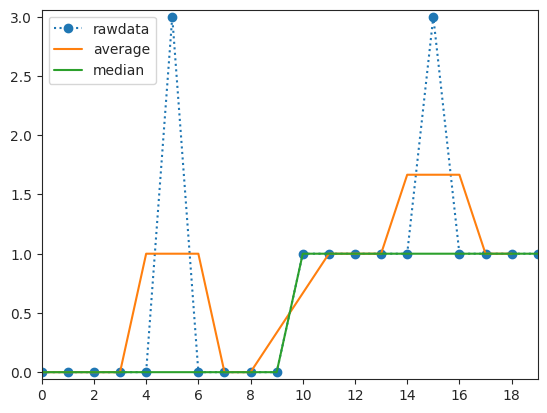

In [ ]:
""" Demonstration of linear and non-linear filters on data with extreme outliers
"""
# Create the data
x = np.zeros(20)
x[10:] = 1
# Add some noise-spikes
x[[5,15]] = 3
# Median filter the signal
x_med = signal.medfilt(x, 3)
# Average filtered data
b = np.ones(3)/3
x_filt = signal.lfilter(b, 1, x)
# Plot the data
plt.plot(x, 'o', linestyle='dotted', label='rawdata')
plt.plot(x_filt[1:], label='average')
plt.plot(x_med, label='median')
plt.xlim([0, 19])
plt.xticks(np.arange(0,20,2))
plt.legend()
ax = plt.gca()
ax.margins(x=0, y=0.02)
# Save and show the image
out_file = 'MedianFilter.jpg'
print(f'Image saved to {out_file}')
plt.show()


Image saved to MedianFilter.jpg


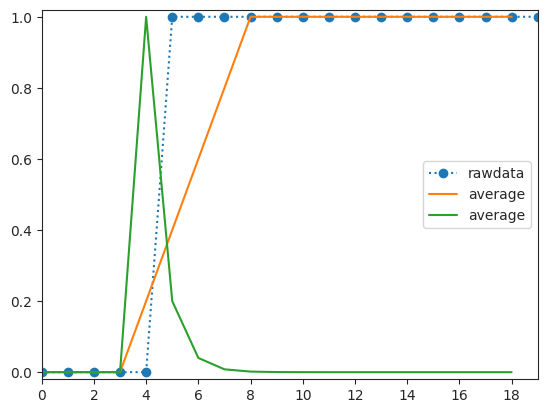

In [ ]:
# Create the data
x = np.zeros(20)
x2 = np.zeros(20)

x[5:] = 1
# Add some noise-spikes
x2[5] = 1
# Average filtered data
b = np.ones(5)/5
x_filt = signal.lfilter(b, 1, x)
x2_filt = signal.lfilter([1], [1, -0.2],x2)
# Plot the data
plt.plot(x, 'o', linestyle='dotted', label='rawdata')
plt.plot(x_filt[1:], label='average')
plt.plot(x2_filt[1:], label='average')

plt.xlim([0, 19])
plt.xticks(np.arange(0,20,2))
plt.legend()
ax = plt.gca()
ax.margins(x=0, y=0.02)
# Save and show the image
out_file = 'MedianFilter.jpg'
print(f'Image saved to {out_file}')
plt.show()


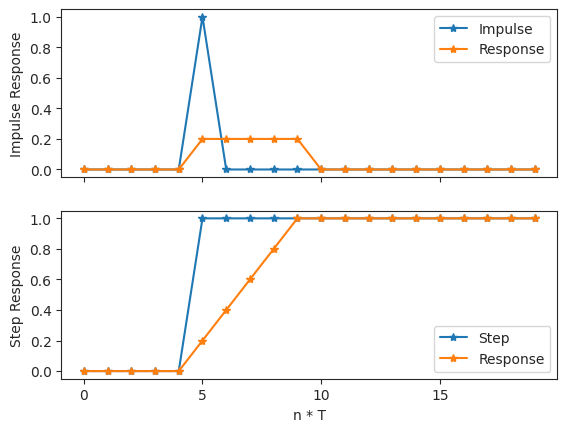

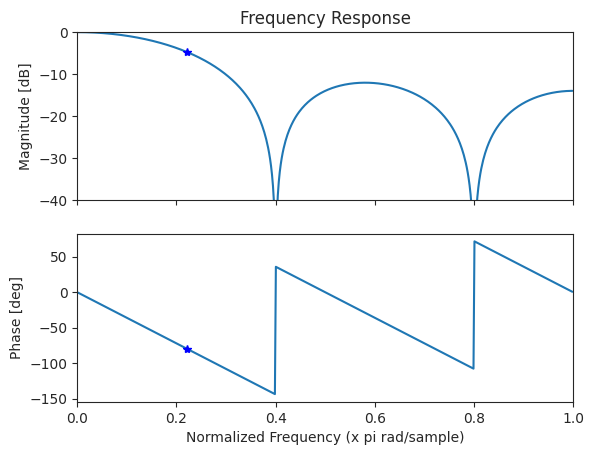

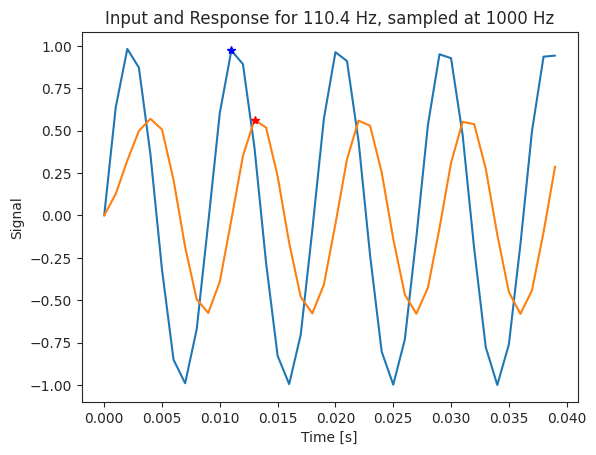

Correct gain and phase: 0.58, and -79.5 deg
Numerical estimation: 0.58, and -79.5 deg


In [ ]:
""" Shows how filters can be characterized. """
# author: Thomas Haslwanter
# date: April-2021
# Import the required packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from typing import Tuple
def impulse_response(a, b, ax) -> None:
  """Show the impulse response of an IIR-filter.
  Parameters
  ----------
  a : array_like
  feedforward coefficients ('1' for FIR-filter)
  b : array_like
  feedback coefficients
  ax : mpl-axis
  plot-axis for the impulse response
  """
  # Define the impulse ...
  xImpulse = np.zeros(20)
  xImpulse[5] = 1
  # ... and find the impulse-response
  yImpulse = signal.lfilter(b, a, xImpulse)
  # Plot input and response
  ax.plot(xImpulse, '*-', label='Impulse')
  ax.plot(yImpulse, '*-', label='Response')
  ax.legend()
  ax.set_ylabel('Impulse Response')
  ax.set_xticks(np.arange(0, len(xImpulse), 5))
  ax.tick_params(axis='x', labelbottom=False)
def step_response(a, b, ax) -> None:
  """Show the impulse response of an IIR-filter.
  Parameters
  ----------
  a : array_like
  feedforward coefficients ('1' for FIR-filter)
  b : array_like
  feedback coefficients
  ax : mpl-axis
  plot-axis for the impulse response
  """
  # Define the step ...
  xStep = np.zeros(20)
  xStep[5:] = 1
  # ... and find the step-response
  yStep = signal.lfilter(b, a, xStep)
  # Plot step and response
  ax.plot(xStep, '*-', label='Step')
  ax.plot(yStep, '*-', label='Response')
  ax.legend(loc='lower right')
  ax.set_xticks( np.arange(0, len(xStep), 5) )
  ax.set_xlabel('n * T')
  ax.set_ylabel('Step Response')

def freq_response(a, b) -> Tuple[float, complex]:
  """ Show the impulse response of an IIR-filter.
  Parameters
  ----------
  a : array_like
  feedforward coefficients ('1' for FIR-filter)
  b : array_like
  feedback coefficients
  Returns
  -------
  w : selected radial frequency of
  h : complex gain for w
  """
  ## Frequency Response
  w, h = signal.freqz(b, a, fs=2) # Calculate the normalized values
  # Plot them, in a new figure
  fig, axs = plt.subplots(2, 1, sharex=True)
  axs[0].plot(w, 20*np.log10( np.abs(h) ))
  axs[0].set_ylim([-40, 0])
  axs[0].set_ylabel('Magnitude [dB]')
  axs[0].set_title('Frequency Response')
  axs[1].plot(w, np.rad2deg(np.arctan2(h.imag, h.real)))
  axs[1].set_ylabel('Phase [deg]')
  axs[1].set_xlabel('Normalized Frequency (x pi rad/sample)')
  axs[1].set_xlim([0, 1])
  selFreq_val = 0.22 # Select a frequency point in the normalized response
  selFreq_nr = np.argmin( np.abs(w-selFreq_val) )
  selFreq_w = w[selFreq_nr] # Value on plot
  # Find gain and phase for the selected frequency
  selFreq_h = h[selFreq_nr]
  gain = np.abs(selFreq_h)
  phase = np.rad2deg(np.angle(selFreq_h))
  # Show it on the plot
  dB = 20*np.log10(gain)
  axs[0].plot(selFreq_w, 20*np.log10( np.abs(selFreq_h) ), 'b*')
  axs[1].plot(selFreq_w,
  np.rad2deg(np.arctan2(selFreq_h.imag,selFreq_h.real)), 'b*')
  plt.show()
  return (selFreq_w, selFreq_h)
def show_filterEffect(w: float, h: complex) -> None:
  """ Demonstrate the filter effect on the selected frequency.
  Parameters
  ----------
  w : radial frequency
  h : complex gain
  """
  # Convert the normalized frequency to an absolute frequency
  rate = 1000
  nyq = rate/2
  dt = 1/rate
  freq = w * nyq # Freqency in Hz, for the selected sample rate
  # Correct gain and phase
  gain = np.abs(h)
  phase = np.rad2deg(np.arctan2(h.imag, h.real))
  # Calculate the input and output sine, for 0.04 sec
  t = np.arange(0, 0.04, dt)
  sin_in = np.sin(2*np.pi * freq * t)
  sin_out = signal.lfilter(b, a, sin_in)
  # Plot them
  plt.plot(t, sin_in, label='Input')
  plt.plot(t, sin_out, label='Output')
  plt.title(f'Input and Response for {freq:4.1f} Hz, sampled at {rate} Hz')
  plt.xlabel('Time [s]')
  plt.ylabel('Signal')
  # Estimate gain and phase-shift from the location of the second maximum
  # First find the two maxima (input and output)
  secondCycle = np.where( (t > 1/freq) & (t < (2/freq) ) )[0]
  secondMaxIn = np.max(sin_in[secondCycle])
  indexSecondMaxIn = np.argmax(sin_in[secondCycle])
  tMaxIn = t[secondCycle[indexSecondMaxIn]]
  secondMaxFiltered = np.max(sin_out[secondCycle])
  indexSecondMaxFiltered = np.argmax(sin_out[secondCycle])
  tMaxOut = t[secondCycle[indexSecondMaxFiltered]]
  # Estimate gain and phase-shift from them
  gain_est = secondMaxFiltered / secondMaxIn
  phase_est = (tMaxIn-tMaxOut)*360*freq
  # Plot them
  plt.plot(tMaxIn, secondMaxIn, 'b*')
  plt.plot(tMaxOut, secondMaxFiltered, 'r*')
  # legend('Input', 'Response', 'maxInput', 'maxResponse')
  plt.show()
  print(f'Correct gain and phase: {gain:4.2f}, and {phase:5.1f} deg')
  print(f'Numerical estimation: {gain_est:4.2f}, and {phase_est:5.1f} deg')
  # If you want to define the figure format, add the following:
  #fig = gcf
  #fig.PaperUnits = 'inches'
  #fig.PaperPosition = [0 0 6 3]
if __name__ == '__main__':
  ## Generate coefficients for an averaging filter (FIR)
  len_filter = 5
  b = np.ones(len_filter)/len_filter
  a=1
  fig, axs = plt.subplots(2, 1, sharex=True)
  impulse_response(a, b, axs[0])
  step_response(a, b, axs[1])
  plt.show()
  w, h = freq_response(a, b)
  show_filterEffect(w, h)




The x-axis of Fig. 5.13 contains the normalized frequency, where 1 corresponds to the Nyquist
frequency. According to the Nyquist–Shannon sampling theorem, information in a signal can only
be faithfully reproduced up to:

###*f_Nyquist = rate/2*

Higher signal frequencies introduce artifacts

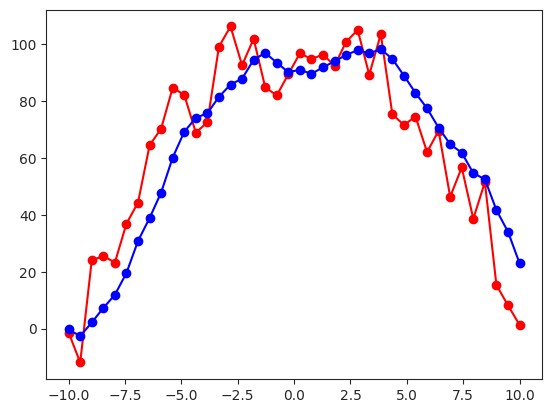

In [ ]:
# The smoothing of data with the best-fit second-order polynomial, fit to the data
# in a five point window, can be achieved with an FIR filter with the following coefficients:
x = np.linspace(-10,10,40)
y = -(x**2) +100 + np.random.randn(len(x))*9
from scipy import signal
w = signal.savgol_coeffs(window_length=5, polyorder=0, deriv=0)
#w = [-0.09, 0.34, 0.49, 0.34, -0.09]
filtered = signal.lfilter(w,1,y)
plt.plot(x,y,"-or")
plt.plot(x,filtered,"-ob")
plt.show()

Advantages of Savitzky–Golay filters They are efficient; they are very convenient to calculate higher derivatives; and smoothing and derivations can be done simultaneously. Disadvantages of Savitzky–Golay filters They don’t have a crisp frequency response. In other words, the gain decreases only gradually as frequency increases. For example, if only frequency components below 200 Hz should pass through the filter, other filtering techniques are preferable, for example Butterworth filters (see Sect. 5.4.2). Also, if the ideal signal characteristics of the true signal are known, a Wiener filter, though more complex to apply, may produce better results (Wiener 1942)

For example, for a sampling rate of 1 kHz (and thus a Nyquist frequency of 500 Hz), a Butterworth low-pass filter with a 3 dB cut-off frequency of 40 Hz and a filter-order of 5 can be
obtained with:


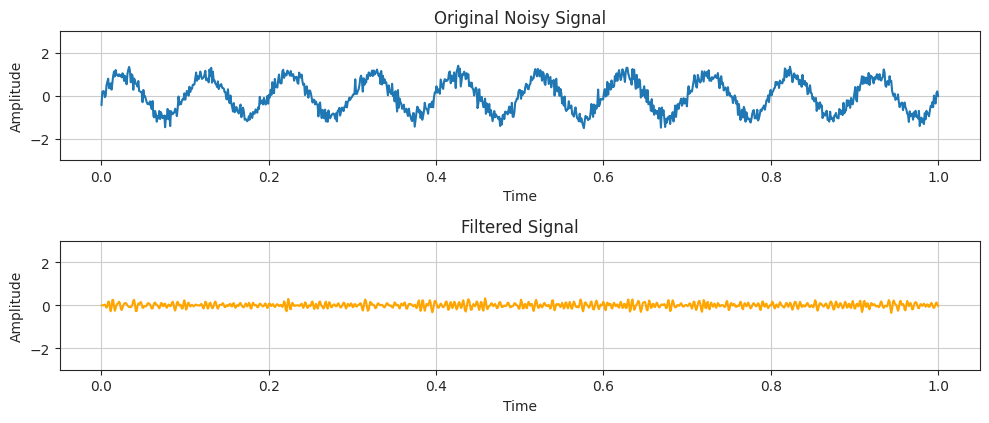

'\n• Depending on the application, other frequency responses might be preferable. For example,\nChebyshef filters provide sharper frequency responses than Butterworth filters, and Bessel\nfilters have the advantage that they show no overshoot in the time domain.\n• For fitting data to a parametric model it is almost always better to use raw data than\npre-smoothed data, since smoothing already discards available information.'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Sample rate and desired cutoff frequencies (in Hz).
fs = 5000.0
lowcut = 500.0
highcut = 1250.0

# Design a Butterworth bandpass filter.
def butter_bandpass(lowcut, highcut, fs, order=5):
    return signal.butter(order, [lowcut, highcut], fs=fs, btype='band')

# Filter a noisy signal (you can replace this with your own data).
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

# Generate a noisy signal (for demonstration purposes).
t = np.linspace(0, 1, 1000)
noisy_signal = np.sin(2 * np.pi * 10 * t) + np.random.normal(0, 0.2, len(t))

# Apply the filter.
filtered_signal = butter_bandpass_filter(noisy_signal, lowcut, highcut, fs, order=6)


# Plot the original and filtered signals.
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.title('Original Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.ylim([-3,3])
plt.grid()


plt.subplot(3, 1, 2)
plt.plot(t, filtered_signal, label='Filtered Signal', color='orange')
plt.title('Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.ylim([-3,3])
plt.grid()

plt.tight_layout()
plt.show()


"""
Warning: Be careful with low filter frequencies and higher order (n ≥ 4) Butterworth filters
where the [b,a] syntax may lead to numerical problems due to round-off errors. In that case
the the “SOS” (second-order sections) syntax, which is the recommended form for IIR-filters,
or the “ZPK” (zero-pole-gain) syntax should be used. Descriptions of these representations can
be found e.g. in (Smith 2007) """

"""
• Depending on the application, other frequency responses might be preferable. For example,
Chebyshef filters provide sharper frequency responses than Butterworth filters, and Bessel
filters have the advantage that they show no overshoot in the time domain.
• For fitting data to a parametric model it is almost always better to use raw data than
pre-smoothed data, since smoothing already discards available information."""

### Integration

Image saved to numericalIntegrationPy.jpg


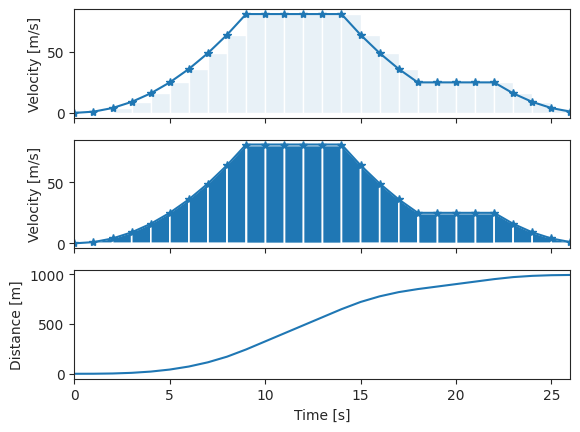

'\nDemonstration on how to numerically integrate position data to get velocity. Top:\nthe area summed up by cumsum. Middle: the area summed up by cumtrapz. Bottom:\ncumulative integral from cumtrapz'

In [ ]:
""" Demonstration on how to numerically integrate a signal """
# Import the standard packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy.integrate import cumtrapz
# Generate velocity data for Fig. 5.19
vel = np.hstack( (np.arange(10)**2,
                  np.ones(4) * 9**2,
                  np.arange(9, 4, -1)**2,
                  np.ones(3) * 5**2,
                  np.arange(5, 0, -1)**2))

time = np.arange(len(vel))

## Plot the data
fig, axs = plt.subplots(3, 1, sharex=True)
axs[0].plot(time, vel, '*-')

for ii in range(len(vel)-1):
  ## Corresponding trapezoid corners
  x = [time[ii], time[ii], time[ii+1], time[ii+1]]
  y = [0, vel[ii], vel[ii], 0]
  data = np.column_stack((x,y))
  axs[0].add_patch(patches.Polygon(data, alpha=0.1))
  axs[0].add_patch(patches.Polygon(data, fill=False))

axs[0].set_ylabel('Velocity [m/s]')
axs[1].plot(time, vel, '*-')

for ii in range(len(vel)-1):
  ## Corresponding trapezoid corners
  x = [time[ii], time[ii], time[ii+1], time[ii+1]]
  y = [0, vel[ii], vel[ii+1], 0]
  data = np.column_stack((x,y))
  axs[1].add_patch(patches.Polygon(data))
  axs[1].add_patch(patches.Polygon(data, fill=False))
axs[1].set_ylabel('Velocity [m/s]')
axs[2].plot(time, np.hstack([0, cumtrapz(vel)]))
axs[2].set_ylabel('Distance [m]')
axs[2].set_xlabel('Time [s]')
axs[2].set_xlim([0, len(vel)-1])
# Save and show the image
out_file = 'numericalIntegrationPy.jpg'
print(f'Image saved to {out_file}')
plt.show()

"""
Demonstration on how to numerically integrate position data to get velocity. Top:
the area summed up by cumsum. Middle: the area summed up by cumtrapz. Bottom:
cumulative integral from cumtrapz"""

Image saved to loess.jpg


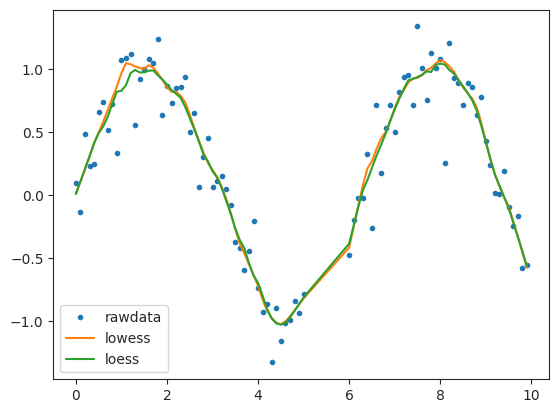

'Lowess and loess differ in the model they use for the regression: lowess uses a linear polynomial, while loess uses a quadratic polynomial. Figure 5.20 demonstrates an example of lowess\nand loess smoothing'

In [ ]:
""" Lowess and Loess-Smoothing
Note that this script requires the installation of the packages 'loess' and
'statsmodels'!
"""

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from loess.loess_1d import loess_1d
np.random.seed(1234)
# Generate some data
x = np.arange(0,10,0.1)
y = np.sin(x) + 0.2 * np.random.randn(len(x))
# Eliminate some, so that we don't have equal sampling distances
cur_ind = np.where( (x>5) & (x<6) )
x_space = np.delete(x, cur_ind)
y_space = np.delete(y, cur_ind)
plt.plot(x_space, y_space, '.', label='rawdata')
# Smooth the data with Lowess, from the package "statsmodels"
smoothed = lowess(y_space, x_space, frac=0.1)
index, data = smoothed.T
plt.plot(index, data, label='lowess')
# Smooth with Loess, from the package "loess"
x_out, y_out, weights = loess_1d(x_space, y_space, frac=0.1)
plt.plot(x_out, y_out, label='loess')
plt.legend()
# Save and show the image
out_file = 'loess.jpg'
print(f'Image saved to {out_file}')
plt.show()

"""Lowess and loess differ in the model they use for the regression: lowess uses a linear polynomial, while loess uses a quadratic polynomial. Figure 5.20 demonstrates an example of lowess
and loess smoothing"""

Splines

Image saved to Bsplines.jpg


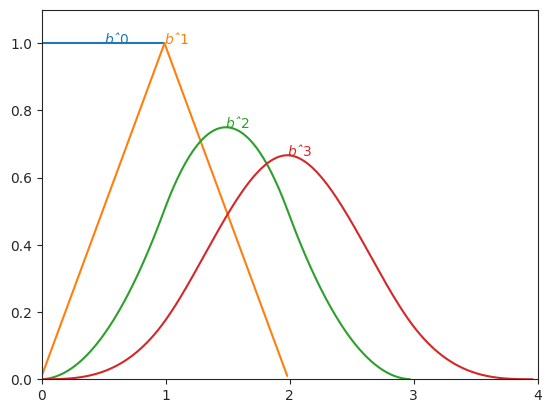

In [ ]:
"""Simple generation of B-splines"""
# Import the required packages
import numpy as np
import matplotlib.pyplot as plt

dt = 0.01 # step interval for plotting
t = np.arange(0,1,dt)

# Generate the B-splines, through convolution
ones = np.ones(len(t))
Bsplines = [ones]

for ii in range(3):
  Bsplines.append(np.convolve(Bsplines[-1], ones))
  # Normalize the integral to "1"
  Bsplines[-1] /= np.sum(Bsplines[-1])*dt

# Plot the Bsplines
for spline in Bsplines:
  plt.plot(np.arange(len(spline))*dt, spline)

# Put on labels
plt.text(0.5, 1, '$bˆ0$', color='C0')
for ii in range(1,4):
  spline = Bsplines[ii]
  loc_max = np.argmax(spline)*dt
  val_max = np.max(spline)
  txt = '$bˆ' + str(ii) + '$' # e.g. '$bˆ1$'
  color = 'C' + str(ii) # e.g. 'C1'
  plt.text(loc_max, val_max, txt, color=color)

# Format the plot
plt.xlim(0, 4)
plt.xticks(np.arange(5))
plt.ylim(0, 1.1)
# Save and show the image
out_file = 'Bsplines.jpg'
print(f'Image saved to {out_file}')
plt.show()

### Kernel Density Estimation

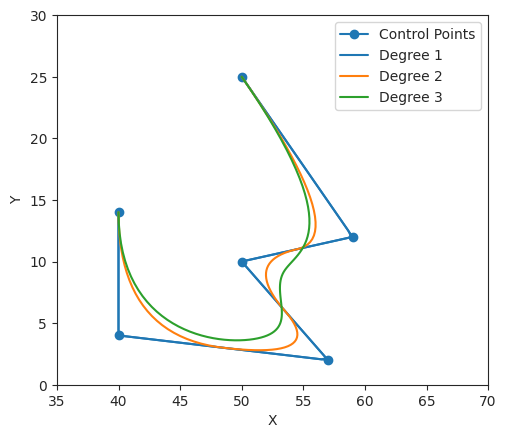

In [ ]:
""" Demonstration of B-splines. """
# author: stack-overflow user Fnord, comments by Thomas Haslwanter
# date: April-2021
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si

def scipy_bspline(cv, n: int=100, degree: int=3, periodic: bool=False) -> np.ndarray:
  """ Calculate n samples on a bspline
  Parameters
  ----------
  cv : Array of control vertices
  n : Number of samples to return
  degree : Curve degree
  periodic : True - Curve is closed
  Returns
  -------
  spline_data : x/y-values of the spline-curve
  """

  cv = np.asarray(cv)
  count = cv.shape[0]
  # Closed curve
  if periodic:
    kv = np.arange(-degree,count+degree+1)
    factor, fraction = divmod(count+degree+1, count)
    cv = np.roll(np.concatenate((cv,) * factor + (cv[:fraction],)),-1,axis
    =0)
    degree = np.clip(degree,1,degree)
  # Opened curve
  else:
    degree = np.clip(degree,1,count-1)
    kv = np.clip(np.arange(count+degree+1)-degree,0,count-degree)
  # Return samples
  max_param = count - (degree * (1-periodic))
  spl = si.BSpline(kv, cv, degree)
  spline_data = spl(np.linspace(0,max_param,n))
  return spline_data
if __name__ == '__main__':
  cv = np.array(  [[ 50., 25.],
                  [ 59., 12.],
                  [ 50., 10.],
                  [ 57., 2.],
                  [ 40., 4.],
                  [ 40., 14.]]  )

  plt.plot(cv[:,0],cv[:,1], 'o-', label='Control Points')
  ax = plt.gca()
  ax.set_prop_cycle(None)
  # for degree in range(1,7):
  for degree in [1, 2, 3]:
    p = scipy_bspline(cv, n=100, degree=degree, periodic=False)
    x,y = p.T
    plt.plot(x, y, label='Degree %s'%degree)
  # Format the plot
  plt.legend()
  plt.xlim(35, 70)
  plt.ylim(0, 30)
  plt.xlabel('X')
  plt.ylabel('Y')
  ax.set_aspect('equal', adjustable='box')




### Filtering Images

In [ ]:
import skimage as ski
img = ski.data.astronaut()
img.shape

(512, 512, 3)

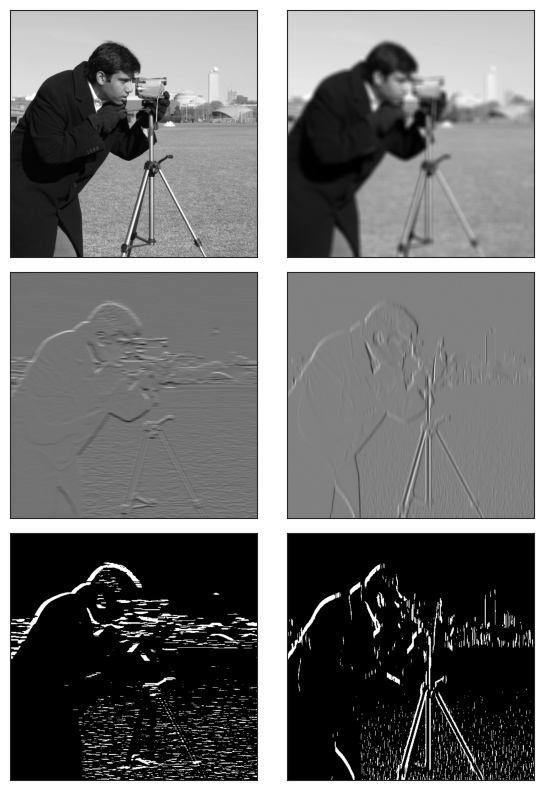

In [ ]:
""" Demonstration on how to filter images """
# author: Thomas Haslwanter
# date: Oct-2019
# Import the standard packages
import numpy as np
import matplotlib.pyplot as plt
import os
# For the image filtering
from scipy import ndimage

# Get the data
import skimage as ski
img = ski.data.camera()
img_f = np.array(img, dtype=float) # for the filtering, the data must not be u-int

# Make the filters: one for averaging, and two for edge detection
Filters = []
Filters.append(np.ones((11,11))/121)
Filters.append(np.array([np.ones(11),np.zeros(11),-1*np.ones(11)]))
Filters.append(Filters[-1].T)

# Filter the images
filtered = []
for filt in Filters:
  filtered.append( ndimage.correlate(img_f, filt) )

# Make the plots
fig, axs = plt.subplots(3,2, figsize=(6,8))
plt.gray()

axs[0,0].imshow(img)
axs[0,1].imshow(filtered[0])
axs[1,0].imshow(filtered[1])
axs[1,1].imshow(filtered[2])
axs[2,0].imshow(filtered[1]>125)
axs[2,1].imshow(filtered[2]>125)

# Remove the ticks and labels
for axis in axs.ravel():
  axis.axes.get_xaxis().set_visible(False)
  axis.axes.get_yaxis().set_visible(False)

# Reduce the space between the plots
plt.tight_layout()



* Top row: Original image (left), and blurred version (right).

* Middle row: Horizontal (left), and vertical (right) edges enhanced.

* Bottom row: Same data as middle row, but
black-and-white converted, with a threshold of 125

<ipython-input-37-a1fed7791471>:24: FutureWarning: `selem` is a deprecated argument name for `binary_erosion`. It will be removed in version 1.0. Please use `footprint` instead.
  ax.imshow(fcn(image, selem=selem))
<ipython-input-37-a1fed7791471>:24: FutureWarning: `selem` is a deprecated argument name for `binary_dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  ax.imshow(fcn(image, selem=selem))
<ipython-input-37-a1fed7791471>:24: FutureWarning: `selem` is a deprecated argument name for `binary_opening`. It will be removed in version 1.0. Please use `footprint` instead.
  ax.imshow(fcn(image, selem=selem))
<ipython-input-37-a1fed7791471>:24: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.
  ax.imshow(fcn(image, selem=selem))


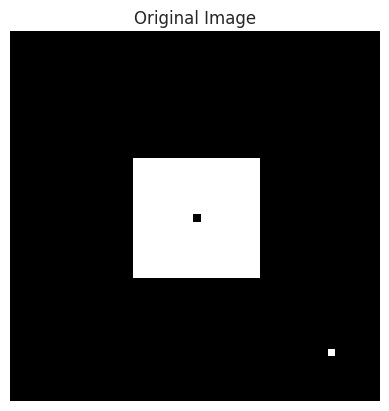

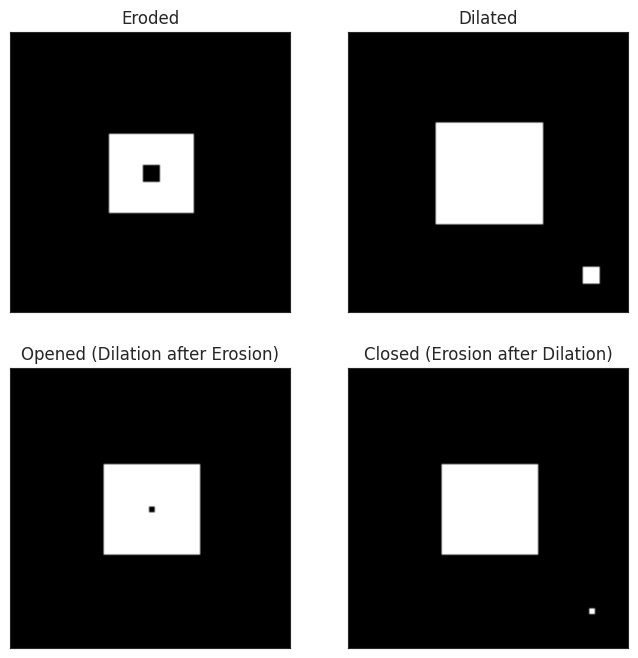

In [ ]:
""" Demonstration of basic morphological operations """
# author: Thomas Haslwanter
# date: April-2021
# Import the required packages
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology
# Convenience functions ensuring consistent styling and folders

# Convenience functions ensuring consistent styling and folders
def show_modImage(image, function: str, ax, title: str) -> None:
  """ Perform a morphological operation on an image, and display it.
  Parameters
  ----------
  image : 2D ndarray
  Image data
  function : name of function from the module skimage.morphology to be
  applied to the data
  ax : Matplotlib axis
  For the generation of the plots
  title : title for the subplot
  """
  fcn = getattr(morphology, function)
  ax.imshow(fcn(image, selem=selem))
  ax.set_title(title)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

if __name__=='__main__':
  # Generate the base image
    data = np.zeros((99, 99))
    data[34:66, 33:67] = 1
    data[85:87, 85:87] = 1
    data[49:51, 49:51] = 0

    # Show the original image
    fig, ax = plt.subplots()
    plt.gray()
    ax.imshow(data)
    ax.set_title('Original Image')
    ax.axis('off')

    # Perform the morphological operations
    selem = morphology.square(5)
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    show_modImage(data, 'binary_erosion', axs[0, 0], 'Eroded')
    show_modImage(data, 'binary_dilation', axs[0, 1], 'Dilated')
    show_modImage(data, 'binary_opening', axs[1, 0], 'Opened (Dilation after Erosion)')
    show_modImage(data, 'binary_closing', axs[1, 1], 'Closed (Erosion after Dilation)')

    plt.show()



Compositions of dilation and erosion: opening and closing of images.

While “opening” an image removes small white spots on a dark background (bottom left),

“closing” an image removes black spots on a white background (bottom right)

### Practical Example


In [ ]:
!pip install scikit-image

In [ ]:
""" Find the pupil-edge in an image of the eye, using sckit-image """
# Import standard modules

"""
import os
import numpy as np
import matplotlib.pyplot as plt
# Modules for image processing
from scipy import ndimage
from skimage import morphology
from skimage import filters
from skimage import data
# Load the eye photo


def show_me(data):
  '''Show image data in graylevel'''
  plt.imshow(data, cmap='gray')
  plt.show()
if __name__ == '__main__':
  # Get the data ...
  file_name = 'SS.bmp'
  in_file = file_name
  data = plt.imread(in_file)
  show_me(data)
  # Calculate and show the histogram
  histo = np.histogram(data, bins=np.arange(0,256))
  plt.plot(histo[1][:-1], histo[0])
  plt.show()
  # Convert to black-and-white
  # for convenience, I choose the threshold automatically
  bw = data>80
  show_me(bw)
  # Fill the holes
  filled = np.invert(ndimage.binary_fill_holes(np.invert(bw)))
  show_me(filled)
  # 'Close' the image, with a disk (radius 10 pixels) as structural element
  se = morphology.disk(10)
  closed = morphology.closing(filled, se)
  show_me(closed)
  # Edge detection
  edges = filters.sobel(closed)
  show_me(edges)
  """


"\nimport os\nimport numpy as np\nimport matplotlib.pyplot as plt\n# Modules for image processing\nfrom scipy import ndimage\nfrom skimage import morphology\nfrom skimage import filters\nfrom skimage import data\n# Load the eye photo\n\n\ndef show_me(data):\n  '''Show image data in graylevel'''\n  plt.imshow(data, cmap='gray')\n  plt.show()\nif __name__ == '__main__':\n  # Get the data ...\n  file_name = 'SS.bmp'\n  in_file = file_name\n  data = plt.imread(in_file)\n  show_me(data)\n  # Calculate and show the histogram\n  histo = np.histogram(data, bins=np.arange(0,256))\n  plt.plot(histo[1][:-1], histo[0])\n  plt.show()\n  # Convert to black-and-white\n  # for convenience, I choose the threshold automatically\n  bw = data>80\n  show_me(bw)\n  # Fill the holes\n  filled = np.invert(ndimage.binary_fill_holes(np.invert(bw)))\n  show_me(filled)\n  # 'Close' the image, with a disk (radius 10 pixels) as structural element\n  se = morphology.disk(10)\n  closed = morphology.closing(filled, se

# CH6
## Event and Features


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Finding Simple Features

In [3]:
time = np.arange(3, 9)
signal = time/10 # just to have some values
is_late = time > 5
is_early = ~is_late
late_indices = np.where(is_late)[0]
late_indices = np.where(time > 5)[0]


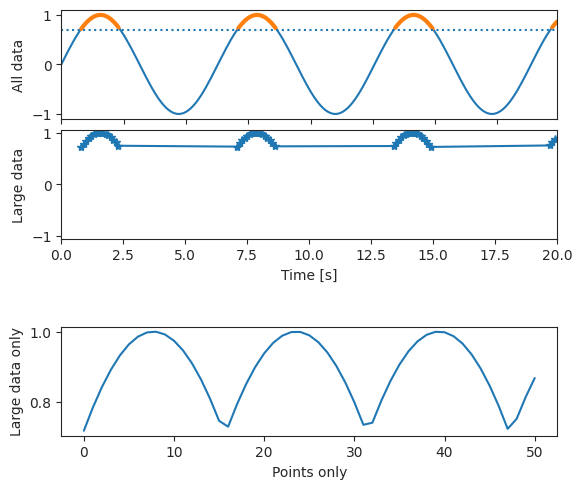

In [ ]:
""" Find Large Signal Values in 1D-Data"""

""" Show logical indexing """

# Import the standard packages
import numpy as np
import matplotlib.pyplot as plt

# Create a sine-wave
dt = 0.1
duration = 20
time = np.arange(0,duration,dt)
data = np.sin(time)

# Set a threshold
threshold = 0.7
# Find the (binary) indices of all data above that threshold
is_large = data > threshold

# For plotting of "large" data, set all "not large" data to "np.nan"

# Note that I explicitly copy the data!
large_data = data.copy()
large_data[~is_large] = np.nan

# Plot the data
fig, axs = plt.subplots(3,1)

axs[0].plot(time, data)
axs[0].plot(time, large_data, lw=3)
axs[1].plot(time[is_large], data[is_large], '*-')
axs[2].plot(data[is_large])

# Format the plot
axs[0].set_ylabel('All data')
axs[0].axhline(threshold, ls='dotted')
axs[0].margins(x=0)
axs[0].set_xticklabels([])

axs[1].set_ylabel('Large data')
axs[1].set_xlabel('Time [s]')
axs[1].margins(x=0)
axs[1].set_xlim(0, duration)
axs[1].set_ylim(-1.05, 1.05)

axs[2].set_ylabel('Large data only')
axs[2].set_xlabel('Points only')
# Group the top two axes, since they have the same x-scale
axs[0].set_position([0.125, 0.75, 0.775, 0.227])
axs[1].set_position([0.125, 0.50, 0.775, 0.227])
axs[2].set_position([0.125, 0.09, 0.775, 0.227])

plt.show()

Find Bright Pixels in Grayscale Image

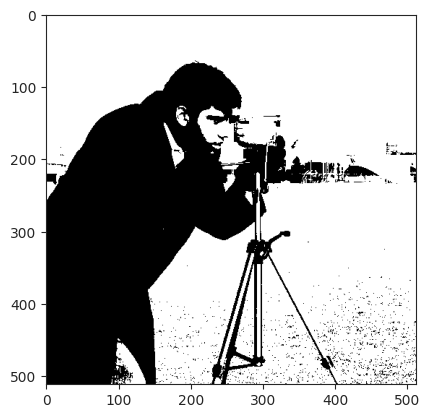

In [ ]:
import skimage as ski
img = ski.data.camera()
bright_threshold = 120
is_bright = img > bright_threshold
plt.imshow(is_bright)
rows, cols = np.where(is_bright)

### Cross-Correlation
Comparing Signals

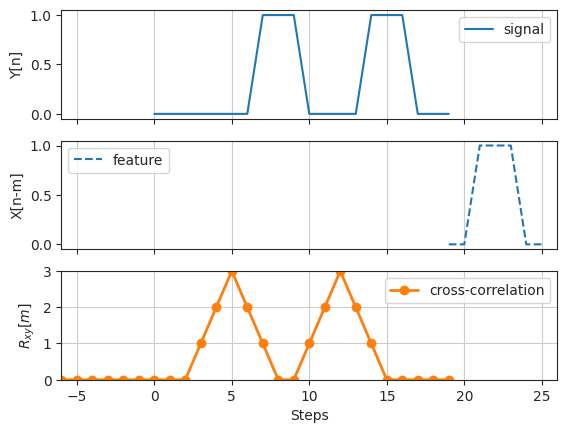

In [ ]:
""" Visualization of cross correlation.
The app is working fine, but for some unclear reason, the app crashes the
testing (after it is closed), with the error message
_tkinter.TclError: can't invoke "update" command: application has been destroyed
"""
# author: Thomas Haslwanter
# date: April-2021
# Import the required packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def corr_vis(x: np.ndarray, y: np.ndarray) -> None:
    """Visualize correlation, by calculating the cross-correlation of two
    signals, one point at a time. The aligned signals and the resulting cross
    correlation value are shown, and advanced when the user hits a key or
    clicks with the mouse.
    Parameters
    ----------
    X : Comparison signal
    Y : Reference signal
    Example
    -------
    x = np.r_[0:2*pi:10j]
    y = sin(x)
    corr_vis(y, x)
    Notes
    -----
    Based on an idea from dpwe@ee.columbia.edu
    """
    Nx = x.size
    Ny = y.size
    Nr = Nx + Ny - 1
    xmin = -(Nx - 1)
    xmax = Ny + Nx - 1

    # Generate figure and axes
    fig, axs = plt.subplots(3, 1)

    # First plot: Signal 1
    axs[0].plot(range(Ny), y, '-', label='signal')
    ax = axs[0].axis()
    axs[0].axis([xmin, xmax, ax[2], ax[3]])
    axs[0].xaxis.grid(True)
    axs[0].set_xticklabels(())
    axs[0].set_ylabel('Y[n]')
    axs[0].legend()

    # Pre-calculate limits of correlation output
    axr = [xmin, xmax, np.correlate(x, y, 'full').min(),
           np.correlate(x, y, 'full').max()]

    # Make a version of y padded to the full extent of X's we'll shift
    padY = np.r_[np.zeros(Nx - 1), y, np.zeros(Nx - 1)]
    Npad = padY.size
    R = []
    # Generate the cross-correlation, step-by-step
    for p in range(Nr):
        try:
            # Figure aligned X
            axs[1].cla()
            axs[1].plot(np.arange(Nx) - Nx + p + 1, x, '--', label='feature')
            ax = axs[1].axis()
            axs[1].axis([xmin, xmax, ax[2], ax[3]])
            axs[1].xaxis.grid(True)
            axs[1].set_ylabel('X[n-m]')
            axs[1].set_xticklabels(())
            axs[1].legend()
            # Calculate correlation
            # Pad an X to the appropriate place
            padX = np.r_[np.zeros(p), x, np.zeros(Npad - Nx - p)]
            R = np.r_[R, np.sum(padX * padY)]
            # Third plot: cross-correlation values
            axs[2].cla()
            axs[2].plot(np.arange(len(R)) - (Nx - 1), R,
                        'o-', linewidth=2, color='C1',
                        label='cross-correlation')
            axs[2].axis(axr)
            axs[2].grid(True)
            axs[2].set_xlabel('Steps')
            axs[2].set_ylabel('$R_{xy}[m]$')
            axs[2].legend()
            # Update the plot
            plt.draw()
            # If one exits early, the command "waitforbuttonpress" crashes, and must
            # be caught. Otherwise, it produces the error-message
            # _tkinter.TclError: can't invoke "update" command: application has
        except Exception as e:
            print('An error occurred:', e)
            print('You returned before it was over :(')
            return
    plt.show()

if __name__ == '__main__':
    sns.set_style('ticks')
    # Generate the data used in the book
    signal = np.zeros(20)
    signal[7:10] = 1
    signal[14:17] = 1
    feature = np.zeros(7)
    feature[2:5] = 1
    corr_vis(feature, signal)


### Autocorrelation

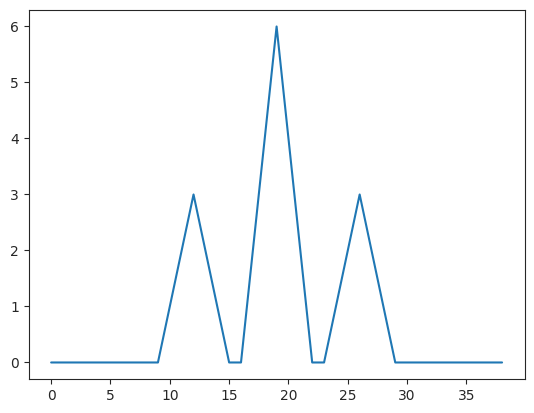

In [ ]:
auto_corr = np.correlate(signal, signal, 'full')
plt.plot(auto_corr)

## Interpolation


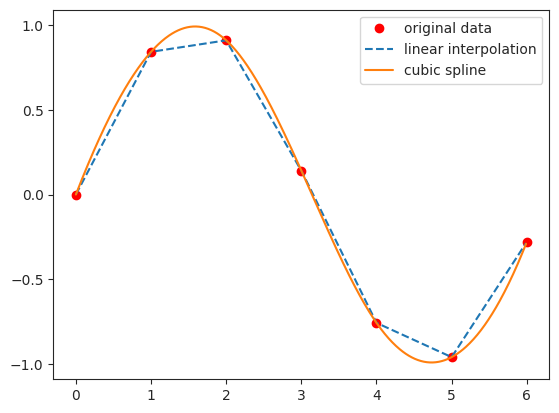

In [ ]:
""" Linear and Cubic interpolations """
# Import the standard packages
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from scipy import signal
# Generate the data
x = np.arange(7)
y = np.sin(x)
# Linear interpolation
xi = np.arange(0, 6, 0.01)
yi = np.interp(xi, x, y)
# Cubic interpolation
cs = CubicSpline(x, y)
yic = cs(xi)
# Plot polynomial interpolations
plt.plot(x, y, 'ro', label = 'original data')
plt.plot(xi, yi, ls='dashed', label='linear interpolation')
plt.plot(xi, yic, label='cubic spline')
# Format the plot
ax = plt.gca()
ax.set_yticks(np.linspace(-1, 1, 5))
#ax.axhline(0, LineStyle='dotted')
plt.legend()
plt.show()

# Ch7 Statistic

### Basics
* Mean and Range
* Median, Quartiles, and Centiles
* Standard Deviation and Variance

### Confidence Intervals
* Standard Error of the Mean (SEM)

### Comparison Test For Normally Distributed Data
* Comparing Data to a Fixed Value
* Hypothesis Tests
* One-sided versus Two-sided Comparisons
* Comparing Two Independent Groups
*  Pre-Post Comparisons

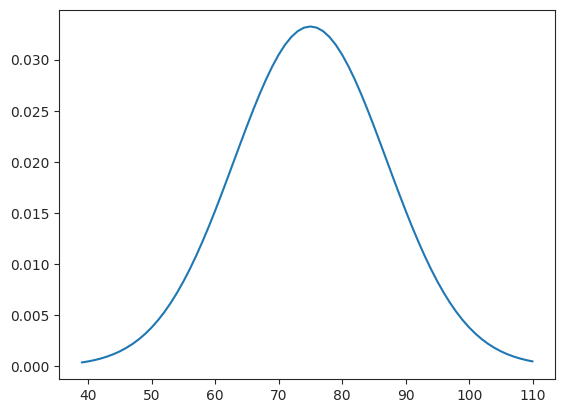

In [ ]:
# Generate the probability distribution, here e.g. for the weight
# of adult Austrian men
from scipy import stats
mu = 75
sd = 12
# In Python a distribution with all parameters fixed is called
# a "frozen distribution function"
nd = stats.norm(mu, sd)
# Calculate and plot the corresponding PDF-function
x = np.arange(mu-3*sd, mu+3*sd)
pdf = nd.pdf(x)
plt.plot(x, pdf)

# CH8


## Parameter Fitting


### Correlations

0.8403901607505618


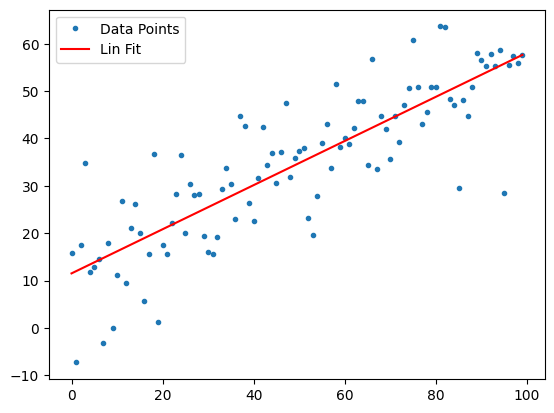

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
x = np.arange(100)
y = 10 + 0.5*x + np.random.randn(len(x))*9
plt.plot(x,y,'.');
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x,slope*x + intercept, "-r")
plt.legend(["Data Points", "Lin Fit"])
print(r_value)

### Line Fit

In [ ]:
X = np.array([[1,2],[3,4],[5,6]])
y = np.array([[6],[14],[22]])
m = np.linalg.lstsq(X, y)[0]
print(f"from lstsq  m= {m}")

m = np.linalg.pinv(X) @ y
print(f"from pseudo-inverse (pinv)  m= {m}")

X2 = np.array([1,2,3,4,5,6])
y2 = np.array([2,4,6,8,10,12])
A = np.vstack([X2,np.ones(len(X2))]).T
m2 , c2 = np.linalg.lstsq(A, y2)[0]
print(f"m = {round(m2,2)}, c= {round(c2,2)}")

from lstsq  m= [[2.]
 [2.]]
from pseudo-inverse (pinv)  m= [[2.]
 [2.]]
m = 2.0, c= -0.0


<ipython-input-67-f54fbee75a29>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(X, y)[0]
<ipython-input-67-f54fbee75a29>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m2 , c2 = np.linalg.lstsq(A, y2)[0]


<ipython-input-68-9d699d62f53c>:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  p_estimator = np.linalg.lstsq(M, y)[0]


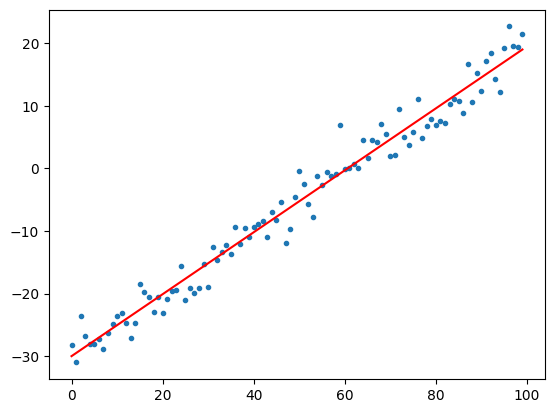

In [ ]:
# Generate a noisy line, with an slope of 0.5
# and a y-intercept of -30
x = np.arange(100)
y = -30 + 0.5*x + 2.5*np.random.randn(len(x))
# Plot the line
plt.plot(x, y, '.')
# Calculate the best-fit line
M = np.column_stack( [x, np.ones_like(x)] )
p_estimator = np.linalg.lstsq(M, y)[0]
#p_estimator = np.linalg.pinv(M) @ y
slope , y_intercept= p_estimator # "m"

#  fit polynomials of arbitrary order
p = np.polyfit(x,y,1)
y_fit = np.polyval(p, x)

# If we are “only” interested in a line-fit,
# probably the most useful function is
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

plt.plot(x,y_fit, "-r")


### Sine Fit

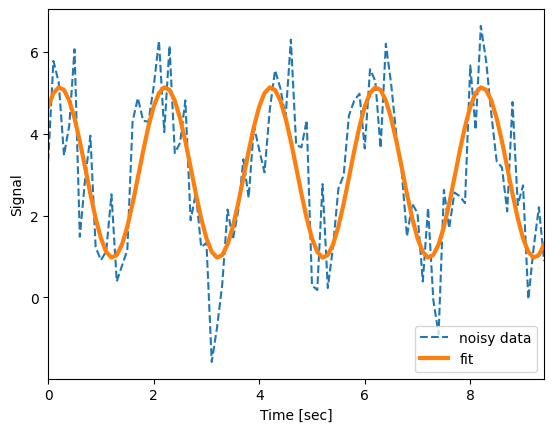

In [ ]:
""" Demonstrate a fit to sinusoidal data """
# Import the standard packages
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters for the sine-wave
freq = 0.5
offset = 3

delta = np.deg2rad(45)
amplitude = 2
rate = 10
duration = 3 * np.pi
omega = 2 * np.pi * freq

# Time
dt = 1/rate
t = np.arange(0,duration, dt)

# Simulate a noisy sine-wave
np.random.seed(123) # to make the noise reproducible
y = offset + amplitude * np.sin(omega*t + delta) + np.random.randn(len(t))

# Show the data
plt.plot(t, y, '--', label='noisy data')
plt.autoscale(axis='x', tight=True)

# Fit the data
M = np.column_stack( (np.ones(len(t)), np.sin(omega*t), np.cos(omega*t)) )
p = np.linalg.pinv(M)@y

# Extract the coefficients from the fit
found = {}
found['offset'] = p[0]
found['amp'] = np.sqrt(p[1]**2 + p[2]**2)
found['delta'] = np.rad2deg(np.arctan2(p[2], p[1]))

found['y'] = found['offset'] + found['amp'] * np.sin(omega*t + np.deg2rad(found['delta']))

# Superpose the fit over the data
plt.plot(t, found['y'], label='fit', lw=3)
plt.legend(loc='lower right')
plt.xlabel('Time [sec]')
plt.ylabel('Signal')

plt.show()

##  Confidence Intervals

###  Finding Confidence Intervals

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.963   
Dependent Variable: y                AIC:                450.5437
Date:               2024-02-17 19:11 BIC:                455.7541
No. Observations:   100              Log-Likelihood:     -223.27 
Df Model:           1                F-statistic:        2573.   
Df Residuals:       98               Prob (F-statistic): 3.74e-72
R-squared:          0.963            Scale:              5.1953  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     30.0262    0.4525  66.3608  0.0000  29.1282  30.9241
x              0.4006    0.0079  50.7289  0.0000   0.3849   0.4162
-----------------------------------------------------------------
Omnibus:              2.753        Durbin-Watson:           1.975
Prob(Omnibus):        

Text(0, 0.5, 'Y axis')

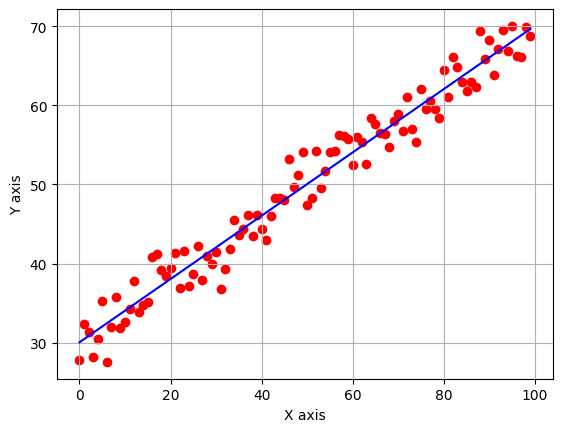

In [ ]:
# IMPORTANT
# VERY USEFUL
"""Statsmodels uses the Python package patsy for describing statistical
models, which allows to formulate “y is a function of x” simply as “y ∼ x”, where an offset is
by default implicitly defined."""

""" Calculation of confidence intervals for a line fit"""
# Import the required packages
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from pprint import pprint

# Gnerate the data
np.random.seed(123)
x = np.arange(100)
y = 30 + 0.4*x+2*np.random.randn(len(x))

# Use a "DataFrame" to contain the data, and a "formula" to define the function
df = pd.DataFrame({'x':x, 'y':y})
formula = 'y~x'
results = smf.ols(formula, data=df).fit()

# Show the results, with the default 95% confidence intervals
print(results.summary2())

# Address some of the fit-parameters
fit = {}
fit['parameters'] = results.params
fit['standard_error'] = results.bse
fit['ci_95'] = results.conf_int() # 95% confidence intervals
fit['ci_999'] = results.conf_int(alpha=0.001) # 99.9% confidence intervals
for key in [key for key in fit.keys() if key.startswith('ci')]:
  print(f'{key}: {fit[key]}')

plt.scatter(x,y,color = "red")
plt.plot(x,fit["parameters"][1]*x + fit["parameters"][0],"-b")
plt.grid()
plt.xlabel("X axis")
plt.ylabel("Y axis")



### Nonlinear Fit

Fitted parameters: [ 2.99620493 29.72608998  5.00853528]


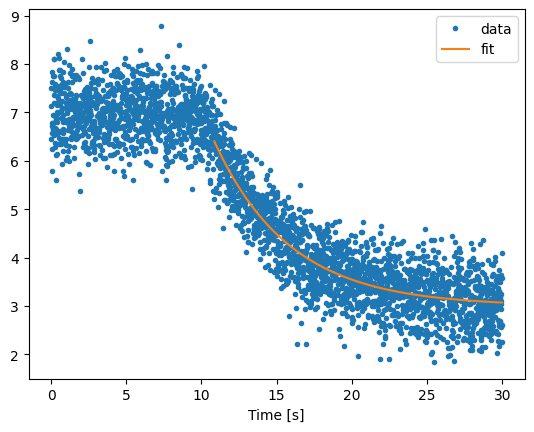

In [ ]:
""" Demonstration of a non-linear fit """
# Import the standard packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def find_start(t, x):
  """ Find where the exponential decay approximately starts """
  max_val = np.max(x)
  level = 0.6 # 40% below maximum
  threshold = max_val * level
  first_below = np.min(np.where(x<threshold)[0])
  return t[first_below]

def model(x, t):
  """ Returns the residuals of the expected function """
  return x[0] + x[1] * np.exp(-t/x[2])

def err_fun(x, t, y):
  """ Error-function that is minimized by the fit """
  return model(x,t) - y

if __name__ == '__main__':
  # Define the parameters
  offset, amp, tau = 3, 4, 5
  t0, noise_amp = 10, 0.5

  # Generate the delayed noisy exponential decay
  time = np.arange(0, 30, 0.01)
  values = offset + amp*np.exp(-(time-t0)/tau)
  values[time<t0] = offset + amp
  np.random.seed(123)
  values += noise_amp * np.random.randn(len(time))

  # Fit the model
  t_start = find_start(time, values)
  decay = time > t_start
  x0 = [0, 1, 1] # initial values for the fit

  par = optimize.least_squares(err_fun, x0, args = (time[decay], values[decay]))
  print(f'Fitted parameters: {par.x}')

  plt.plot(time, values, '.', label='data')
  plt.plot(time[decay], model(par.x, time[decay]), label='fit')
  plt.legend()
  plt.xlabel('Time [s]')
  plt.show()

# Ch9
# Spectral Signal Analysis

## 9.1 Transforming Data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


50.0


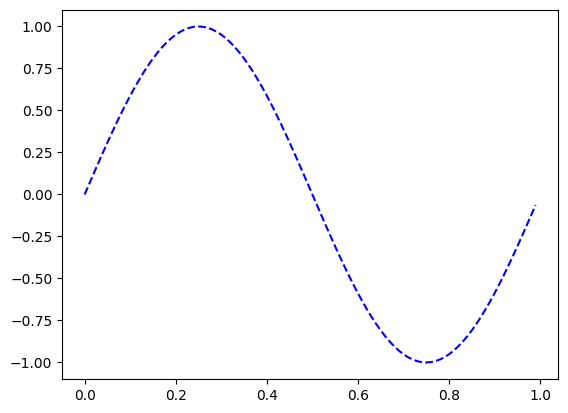

In [ ]:
import numpy as np
num_pts = 100
t = np.arange(0, 1, 1/num_pts)
x = np.sin(2*np.pi*t)
fft_coeffs = np.fft.fft(x)
print(np.max(np.abs(fft_coeffs)))
plt.plot(t,x,"--b")



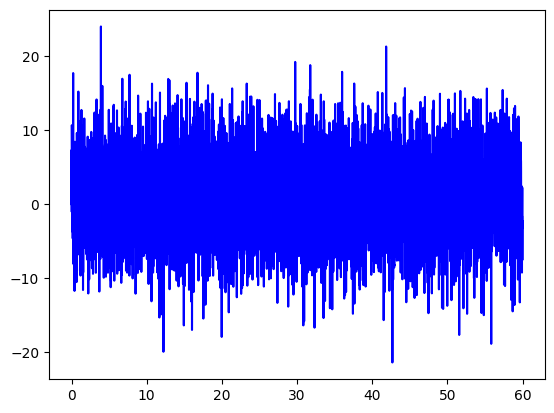

In [ ]:
import heapq

def find_n_max_and_indices(arr, n):
    max_values_with_indices = heapq.nlargest(n, enumerate(arr), key=lambda x: x[1])
    max_indices = [index for index, value in max_values_with_indices]
    max_values = [value for index, value in max_values_with_indices]
    return max_values, max_indices

import numpy as np

# First set the parameters
rate = 100 # [Hz]
duration = 60 # [sec]
freqs = [3, 7, 20]
amps = [1, 2, 3]
offset = 1
np.random.seed(12345)

# Then calculate the data
t = np.arange(0, duration, 1/rate)
sig = np.zeros_like(t)

for (amp, freq) in zip(amps, freqs):
  omega = 2 * np.pi * freq
  sig += amp * np.sin(omega*t)

# Add some noise, and an offset
sig += np.random.randn(len(sig))*5 + offset

plt.plot(t,sig,"-b")


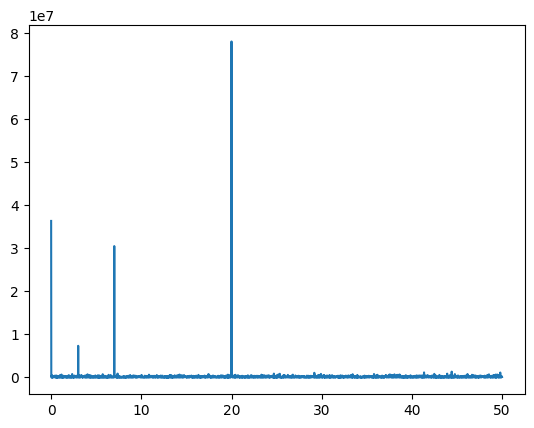

In [ ]:
from numpy import fft
fourier = fft.rfft(sig)
Pxx = np.abs(fourier)**2

indexes = np.array(find_n_max_and_indices(Pxx,7)[1])

frequency = np.fft.rfftfreq(len(sig),1/rate)
plt.plot(frequency,Pxx)
sig_reconstructed = fft.irfft(fourier)

[11209.56387657  +0.j           177.82915013-682.68154812j
   -99.80548376 -49.58237008j]


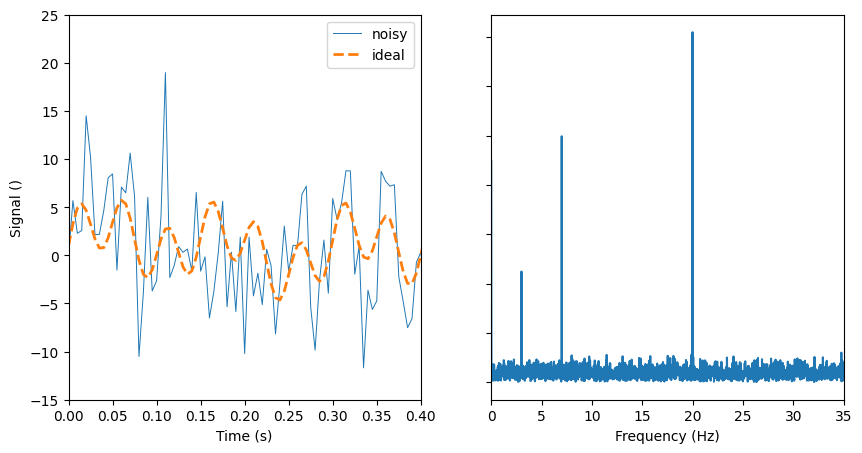

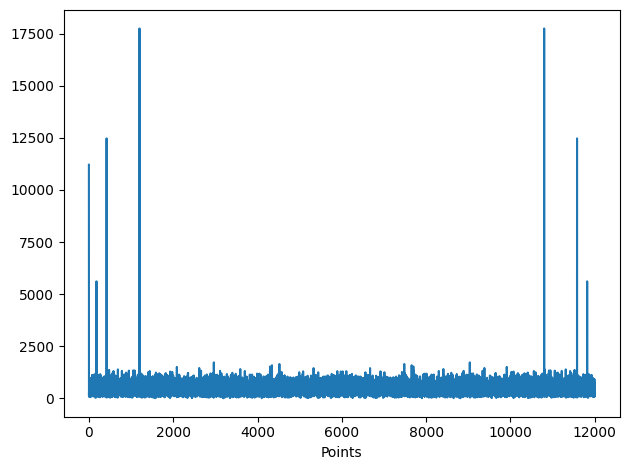

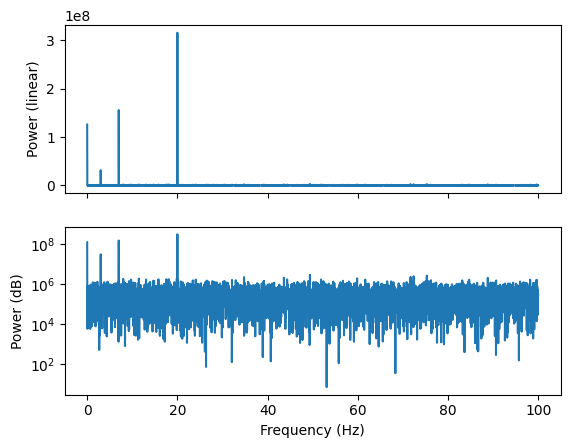

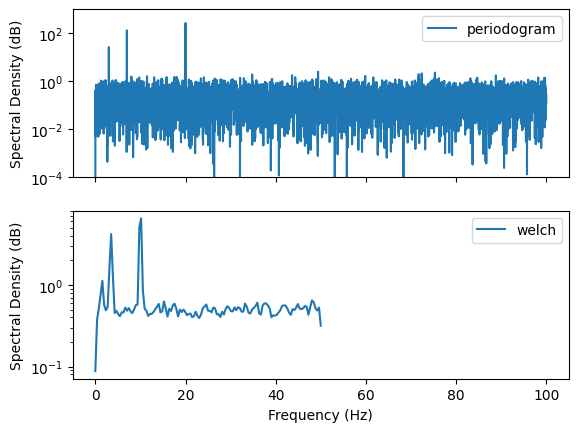

In [ ]:
""" Example of Fourier Transformation and Power-spectra.
If you want the output to use the LaTeX-formatting, please
i) make sure that LaTeX is installed properly on your system, and then
ii) manually set the flag 'latex_installed' in line 22 to 'True'
Also note that the generation of LaTex-formatted figures is rather slow,
since LaTeX has to be launched in the background.
"""
# author: Thomas Haslwanter
# date: April-2021
# Import the standard packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd
import os
from typing import Tuple
# For simplified presentation

def generate_data() -> Tuple[np.ndarray, float, np.ndarray, np.ndarray]:
  """ Generate sample data for the FFT-demo
  Signal is a superposition of three sine waves.
  Returns
  -------
  t : time vector [s]
  dt : sample interval [s]
  sig_with_noise : signal vector, with random noise added
  sig_without_noise : signal vector
  """
  # First set the parameters

  rate = 200 # [Hz]
  duration = 60 # [sec]
  freqs = [3, 7, 20]
  amps = [1, 2, 3]

  # Then calculate the data
  dt = 1/rate
  t = np.arange(0, duration, dt)

  # The clear way of doing it
  sig = np.zeros_like(t)

  for (amp, freq) in zip(amps, freqs):
    omega = 2 * np.pi * freq
    sig += amp * np.sin(omega*t)

  # Add some noise, and an offset
  np.random.seed(12345)
  offset = 1
  noise_amp = 5
  sig_without_noise = sig + offset
  sig_with_noise = sig_without_noise + noise_amp * np.random.randn(len(sig))

  # Note that the same could be achived with a single line of code.
  # However, in my opinion that is much less clear
  #sig = np.ravel(np.atleast_2d(amps) @ np.sin(2*np.pi * np.c_[freqs]*t)) + \
  # 1 + np.random.randn(len(t))*5

  return (t, dt, sig_with_noise, sig_without_noise)


def power_spectrum(t: np.ndarray, dt: float,
  sig: np.ndarray,
  sig_ideal: np.ndarray) -> None:

  """ Demonstrate three different ways to calculate the power-spectrum
  Parameters
  ----------
  t : time [sec]
  dt : sample period [sec]
  sig : sample signal to be analyzed
  sig_ideal : signal without noise
  """

  fig, axs = plt.subplots(1,2, figsize=(10, 5))

  # From a quick look we learn - nothing
  axs[0].plot(t, sig, lw=0.7, label='noisy')
  axs[0].plot(t, sig_ideal, ls='dashed', lw=2, label='ideal')
  axs[0].set_xlim(0, 0.4)
  axs[0].set_ylim(-15, 25)
  axs[0].set_xlabel('Time (s)')
  axs[0].set_ylabel('Signal ()')
  axs[0].legend()

  #axs[0].text(0.2, 26, s=txt, fontsize=16)
  # Calculate the spectrum by hand
  fft = np.fft.fft(sig)
  print(fft[:3])
  fft_abs = np.abs(fft)

  # The easiest way to calculate the frequencies
  freq = np.fft.fftfreq(len(sig), dt)
  axs[1].plot(freq, fft_abs)
  axs[1].set_xlim(0, 35)
  axs[1].set_xlabel('Frequency (Hz)')
  #axs[1].set_ylabel(label)
  axs[1].set_yticklabels([])
  plt.show()

  # Also show the double-sided spectrum
  fig, ax = plt.subplots(1,1)
  ax.plot(fft_abs)
  #ax.set_xlim(0, 35)
  ax.set_xlabel('Points')
  #ax.set_ylabel(label)
  plt.tight_layout()

  # With real input, the power spectrum is symmetrical and we only one half
  fft_abs = fft_abs[:int(len(fft_abs)/2)]
  freq = freq[:int(len(freq)/2)]

  # The power is the norm of the amplitude squared
  Pxx = fft_abs**2

  # Showing the same data on a linear and a log scale
  fig, axs = plt.subplots(2,1, sharex=True)
  axs[0].plot(freq, Pxx)
  axs[0].set_ylabel('Power (linear)')
  axs[1].semilogy(freq, Pxx)
  axs[1].set_xlabel('Frequency (Hz)')
  axs[1].set_ylabel('Power (dB)')

  # Periodogram and Welch-Periodogram
  f_pgram, P_pgram = signal.periodogram(sig, fs = 1/dt)
  f_welch, P_welch = signal.welch(sig, fs = 100, nperseg=2**8)
  fig, axs = plt.subplots(2, 1, sharex=True)

  axs[0].semilogy(f_pgram, P_pgram, label='periodogram')
  axs[1].semilogy(f_welch, P_welch, label='welch')
  axs[0].set_ylabel('Spectral Density (dB)')
  axs[0].legend()
  axs[0].set_ylim(1e-4, 1e3)
  axs[1].set_xlabel('Frequency (Hz)')
  axs[1].set_ylabel('Spectral Density (dB)')
  axs[1].legend()


if __name__ == '__main__':
  data = generate_data()
  power_spectrum(*data)
  # Equivalent to:
  #power_spectrum(data[0], data[1], data[2], data[3])



### Power Spectrum

[ 18.6473977  +0.j          30.64371581 +5.65072862j
 -31.49872556-11.79871523j]


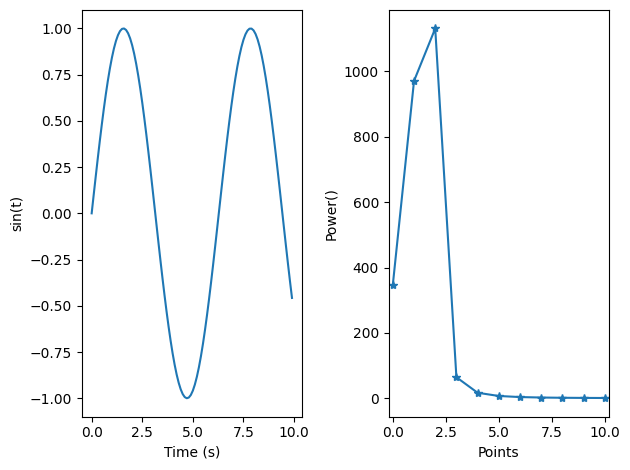

In [ ]:
# Get the required packages
import numpy as np
import matplotlib.pyplot as plt
# Generate the data
t = np.arange(0, 10, 0.1)
x = np.sin(t)
fft_data = np.fft.fft(x)
Pxx = np.abs(fft_data)**2
# Show a few values
print(fft_data[:3])
# Plot the signal
fig, axs = plt.subplots(1,2)
axs[0].plot(t,x)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('sin(t)')
axs[1].plot(Pxx, '-*')
axs[1].set_xlim([-0.2, 10.2])
axs[1].set_xlabel('Points')
axs[1].set_ylabel('Power()')
plt.tight_layout()
plt.show()